# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [20]:
# Import your libraries

from scipy import stats
from scipy.stats import binom
from scipy.stats import geom
from scipy.stats import uniform
from scipy.stats import norm

import numpy as np

import matplotlib.pyplot as plt

# Challenge 1 - Generate and Plot Normal Distributions

#### Step 1: Generate samples and test normal distribution

Use mean=50, standard_deviation=5, and sample_size=[10, 50, 500, 5000] to generate 4 random samples that are normally distributed. Test your normal distributions with [`scipy.stats.normaltest`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html).


*Hint: Read the documentation for `scipy.stats.normaltest`. The function does not simply return Yes or No for whether your data is normal distribution. It returns the likelihood.*

In [14]:
# Your code here

# Definimos la media y la desviación
mu, sigma = 50, 5

# Definimos los sample sizes con una serie
sample_size = pd.Series([10, 50, 500, 5000, 50000])

# Creamos una muestra aleatoria para cada sample size, con nuestra media y desviación
dists = sample_size.apply(lambda s: np.random.normal(mu, sigma, s))

# Aplicamos normaltest a cada uno de nuestros samples, para comprobar cuán normales son.
tests = dists.apply(lambda d: stats.normaltest(d))

tests

0       (0.525760366161314, 0.768834011115352)
1       (2.20875911655324, 0.3314164430552197)
2      (4.68574432931882, 0.09605136633135698)
3    (2.3555511187924307, 0.30796302269645753)
4     (2.3727457013760063, 0.3053267236368466)
dtype: object

#### Interpret the normaltest results and make your observations.

Normaltest nos devuelve dos valores: (s^2 + k^2) y pvalue.

· s indica cómo de asimétrica es la distribución de cada muestra aleatoria. Cuanto menor sea, más simétrica es. 
· k indica cómo de concentrados están los valores de cada muestra aleatoria. Cuanto menor sea, más cerca está la concentración de los valores de la muestra de la concentración de una distribución normal.

Por tanto, cuanto menor el primer valor, más cerca está la muestra de tener una distribución normal.

· pvalue indica la probabilidad de que haya un valor más alejado de la media que una observación determinada, en el test de la hipótesis nula.  

In [23]:
# hipótesis nula: dist tiene una distribución normal

alpha = 0.05

for sk, pvalue in tests:
    if pvalue < alpha:  
        print("Se rechaza la hipótesis nula: no es una distribución normal.")
    else:
        print("No se rechaza la hipótesis nula: es una distribución normal.")

No se rechaza la hipótesis nula: es una distribución normal.
No se rechaza la hipótesis nula: es una distribución normal.
No se rechaza la hipótesis nula: es una distribución normal.
No se rechaza la hipótesis nula: es una distribución normal.
No se rechaza la hipótesis nula: es una distribución normal.


#### Step 2: Plot normal distributions

Use matplotlib subplots to plot a histogram of each sample. 

*Hints:*
- Use subplots to compare your figures side by side.

- Your output should look like below:

![normal distributions with different sample sizes](ch-1.png)

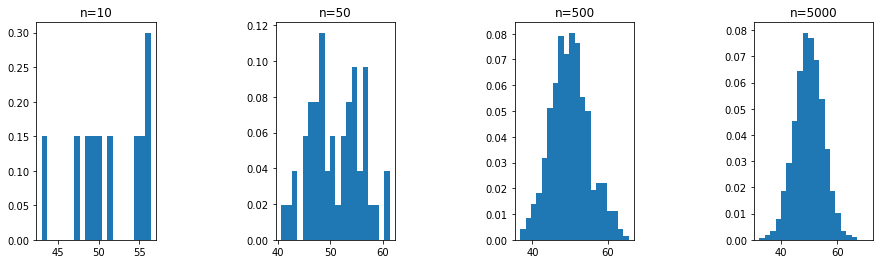

In [26]:
# Your code here
f, ax = plt.subplots(1, 4)

f.set_figwidth(15)

f.subplots_adjust(wspace=1)

for i in range(0, 4):
    ax[i].set_title('n=%s' % (sample_size[i]))
    count, bins, ignored = ax[i].hist(dists[i], 20, density=True)

#### Compare the distributions above. What do you observe? Explain with the Central Limit Theorem.

A medida que aumenta el tamaño de la muestra aleatoria, más se acerca la distribución a una distribución normal. 

# Challenge 2 - Plot Probability Mass Function (PMF)

#### Background knowledge

[PMF](https://en.wikipedia.org/wiki/Probability_mass_function) shows the probability distribution of a **discrete random variable**. A [discrete random variable](https://en.wikipedia.org/wiki/Random_variable#Discrete_random_variable) has random numeric values that are not continuous. For example, the number of people in a household can only be integers but not floats. Therefore the number of people in a household is a discrete variable.

#### Question: We assume that the probability of clicking an Ad in a Youtube video is 0.15. We have a sample of 5 people who wathched the video and we want to plot the PMF for a binomial distribution.

*Hint: use binom from `scipy.stats.binom`. Your output should look like below:*

![binom 10](ch-2.png)

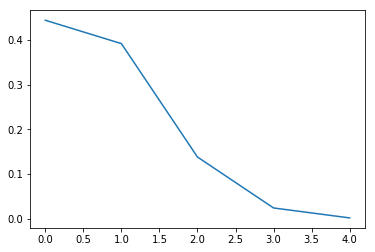

In [28]:
# Your code here

n, p = 5, 0.15

x = range(n)

dist = binom(n, p)

fig, ax = plt.subplots(1, 1)

plt.plot(x, dist.pmf(x))

plt.show()

#### Explain what you observe from the plot above

In [ ]:
# Your comment here



#### Now plot PMP with 50, 500, and 5000 visitors.

TypeError: unsupported operand type(s) for -: 'range' and 'int'

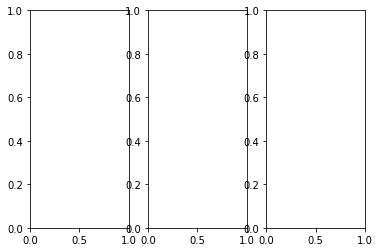

In [31]:
# Your code here

visitors = [50, 500, 5000]

for n in visitors:
    p = 0.15
    x = range(n)
    dist = binom(n, p)
    fig, ax = plt.subplots(1, 1)
    plt.plot(x, dist.pmf(x))

plt.show()

In [ ]:
dist = binom(n, p)

fig, ax = plt.subplots(1, 3)

plt.plot(x, dist.pmf(x))

plt.show()


dists = sample_size.apply(lambda s: np.random.normal(mu, sigma, s))

#### What did you notice from the distribution plots? Comment your findings.

In [ ]:
# Your comment here


# Challenge 3

#### Reaserch the Poisson distribution. Write about your own understanding of the Poisson distribution.

In [ ]:
# Your comment here

#### A website has an average of 300 visits per day. What is the probability of getting 320 visitors in a day?

*Hint: use `scipy.stats.poisson`*

In [ ]:
# Your code here

#### What is the probability of getting 60 visits?

In [ ]:
# Your code here

#### Plot the distribution of the probability for getting 0-1000 visits.

*Hints:* 

- Create a list to store the Poisson distribution probabilities for n=0 to 1000. Then plot the probabilities.

- Your plot should look like below:

![poisson distribution](ch-3.png)

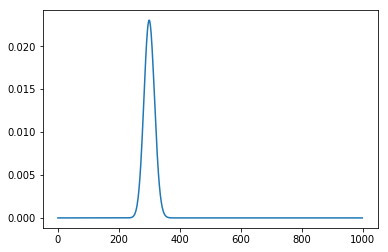

In [115]:
# your code here
from scipy.stats import poisson

N = np.arange(1000)

rv = poisson(300)

arr = []

for n in N:
    arr.append(rv.pmf(n))

plt.plot(arr)